### To Do:
* implement frame queue during operating times
* investigate methods to merge pointclouds
* generate filter for close object, ignoring background

In [37]:
'''
Just access one image from camera

Test
'''

#!/usr/bin/python3

import pyrealsense2 as rs
import numpy as np
import cv2

import sys, os, datetime, time

windowname = 'RealSense'

# Configure depth and color streams
pipeline = rs.pipeline()

# Create config, 30 fps 640x480 resolution
cfg = rs.config()
cfg.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
cfg.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)
cfg.enable_stream(rs.stream.infrared, 640, 480, rs.format.y8, 30)  # Only 1 IR on L515

if cfg.can_resolve(pipeline):
    print("Stream setup complete")
else:
    print("Config is incompatible")

# Create pointcloud object
pc = rs.pointcloud();
    
# Start streaming
profile = pipeline.start(cfg)

# Throw away first ten frames to let exposure adjust
for i in range(10):
    pipeline.wait_for_frames()

# Collect 10 frames, 1 sec apart
count = 0
for i in range(10):
    frames = pipeline.wait_for_frames()
    
    depth_frame = frames.get_depth_frame()
    color_frame = frames.get_color_frame()
    ir_frame = frames.get_infrared_frame()
    
    pc.map_to(color_frame);
    pointcloud = pc.calculate(depth_frame);
    pointcloud.export_to_ply(f"pointclouds/{count}.ply", color_frame);
    
    print(f"pointclouds/{count}.ply saved!")
    
    time.sleep(1)
    count += 1
    
pipeline.stop()

Stream setup complete
pointclouds/0.ply saved!
pointclouds/1.ply saved!
pointclouds/2.ply saved!
pointclouds/3.ply saved!
pointclouds/4.ply saved!
pointclouds/5.ply saved!
pointclouds/6.ply saved!
pointclouds/7.ply saved!
pointclouds/8.ply saved!
pointclouds/9.ply saved!


In [21]:
# Option 1:
# create pointcloud object
pc = rs.pointcloud();
pc.map_to(color_frame);
pointcloud = pc.calculate(depth_frame);
pointcloud.export_to_ply("1.ply", color_frame);
cloud = PyntCloud.from_file("1.ply");
cloud.plot()

In [23]:
# Option 2: (older, options unclear)
# Create save_to_ply object
ply = rs.save_to_ply("1.ply")

print("Saving to 1.ply...")
# Apply the processing block to the frameset which contains the depth frame and the texture
ply.process(frames)
print("Done")

Saving to 1.ply...
Done


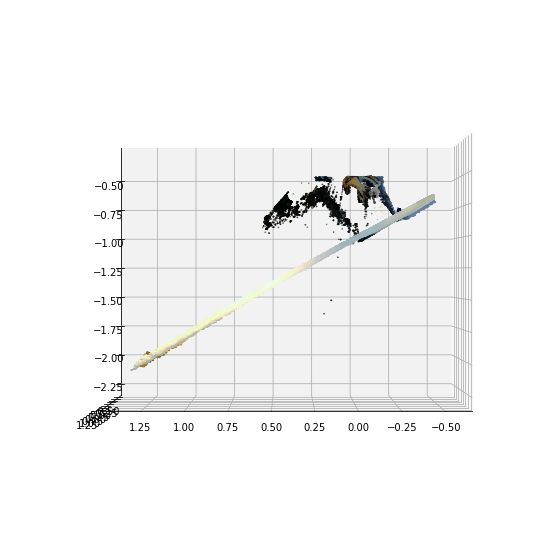

In [41]:
from pyntcloud import PyntCloud  # Used to visualize pointclouds

cloud = PyntCloud.from_file("pointclouds/1.ply")
cloud.plot()

In [ ]:
# Apply colormap on depth image (image must be converted to 8-bit per pixel first)
depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)
# Resize color_image to match depth
color_image = cv2.resize(color_image, dsize=depth_colormap.shape[1::-1])
# Stack images together
bottom_images = np.hstack((color_image, depth_colormap))

# Show images
cv2.namedWindow(windowname, cv2.WINDOW_AUTOSIZE)
cv2.imshow(windowname, bottom_images)
cv2.waitKey(0)

In [12]:
color_image.shape

(480, 640, 3)

In [13]:
color_image.shape

(480, 640, 3)